In [291]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

# 1. Load & Transform the Data [20 points]


a) [15 points] To begin, create a function called `load_data` that reads in the csv file and produces a `pd.DataFrame` that looks like:

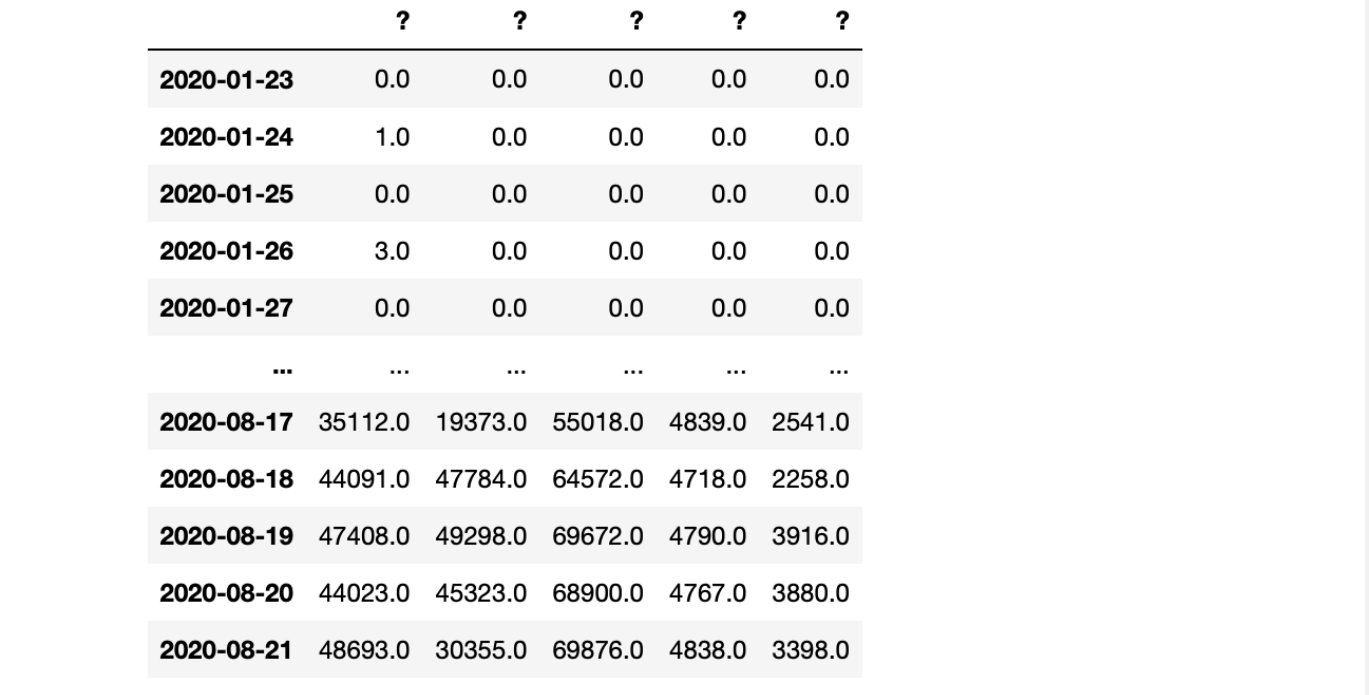

where
- the index of the DataFrame is a `pd.DatetimeIndex`;
- the column names "?" are the top 5 countries with the most cumulative cases as of August 21, 2020, sorted in descending order from left to right;
- the values of the DataFrame are daily new cases; and
- the DataFrame doesn't contain any `NaN` values.


This function should return a `pd.DataFrame` of shape (212, 5), whose index is a
`pd.DatetimeIndex` and whose column labels are the top 5 countries.


In [292]:
def load_data():
    raw = pd.read_csv("time_series_covid19_confirmed_global.csv") 
    top5 = raw.sort_values(by=['8/21/20'], ascending=False).head(5)
    top5.drop(['Province/State','Lat', 'Long'], axis=1, inplace=True)
    top5.set_index('Country/Region', inplace=True)
    transposed = top5.T
    transposed.columns.name = None
    transposed.reset_index(inplace=True)
    transposed['new_index'] =  pd.to_datetime(transposed['index'], format='%m/%d/%y')
    transposed.set_index('new_index', inplace=True)
    transposed.drop(['index'], axis=1, inplace=True)
    transposed.index.name = None
    df = transposed.diff()
    df.dropna(inplace=True)
    return df

df = load_data()
print(df.shape)
df

(212, 5)


,US,Brazil,India,Russia,South Africa
2020-01-23,0.0,0.0,0.0,0.0,0.0
2020-01-24,1.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0
2020-01-26,3.0,0.0,0.0,0.0,0.0
2020-01-27,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2020-08-17,35112.0,19373.0,55018.0,4839.0,2541.0
2020-08-18,44091.0,47784.0,64572.0,4718.0,2258.0
2020-08-19,47408.0,49298.0,69672.0,4790.0,3916.0
2020-08-20,44023.0,45323.0,68900.0,4767.0,3880.0


b) [5 points] Then, using your newly created ‘load_data’ function, plot one line for each country that is in the top 5 for most cumulative cases where the x-axis is the date and the y-axis is the number of cases. Please do so within one figure.

Text(0.5, 1.02, 'Cumulative Cases over time for Top 5 Countries')

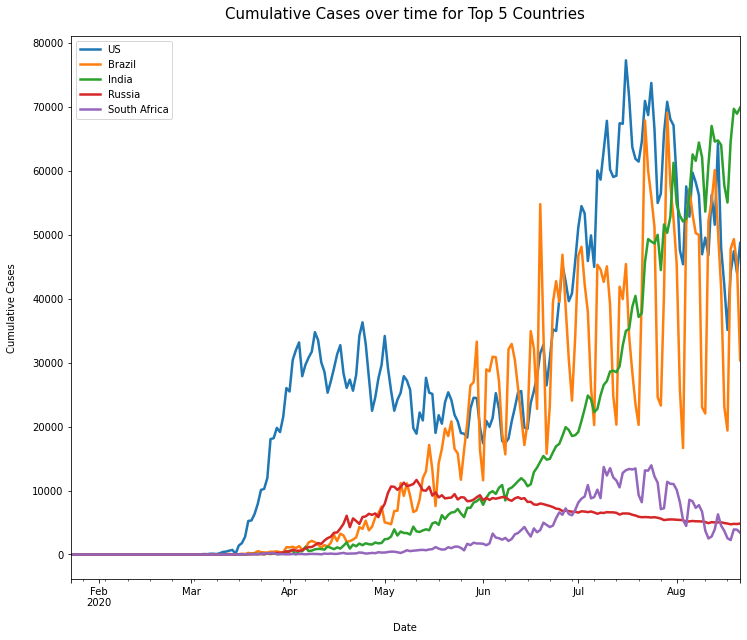

In [293]:
df = load_data()

df.plot(figsize=(12, 10), linewidth=2.5)
plt.xlabel("Date", labelpad=15)
plt.ylabel("Cumulative Cases", labelpad=15)
plt.title("Cumulative Cases over time for Top 5 Countries", y=1.02, fontsize=15)

# 2. Extract Seasonal Components [15 points]

Recall from lecture and lab that an additive Seasonal Decomposition decomposes a time series into the following components:

Y(t) = T(t) + S(t) + R(t)

where T(t) represents trends, S(t) represents seasonal patterns and R(t) represents residuals. In the rest of the assignment, we will work with the seasonal component S(t) to understand the similarities among the seasonal patterns of the five time series we have, so let's write a function
that extracts this very seasonal component.

a) [10 points] Complete a function, ‘sea_decomp’, that accepts a `pd.DataFrame` and returns another `pd.DataFrame` of the same shape that looks like:

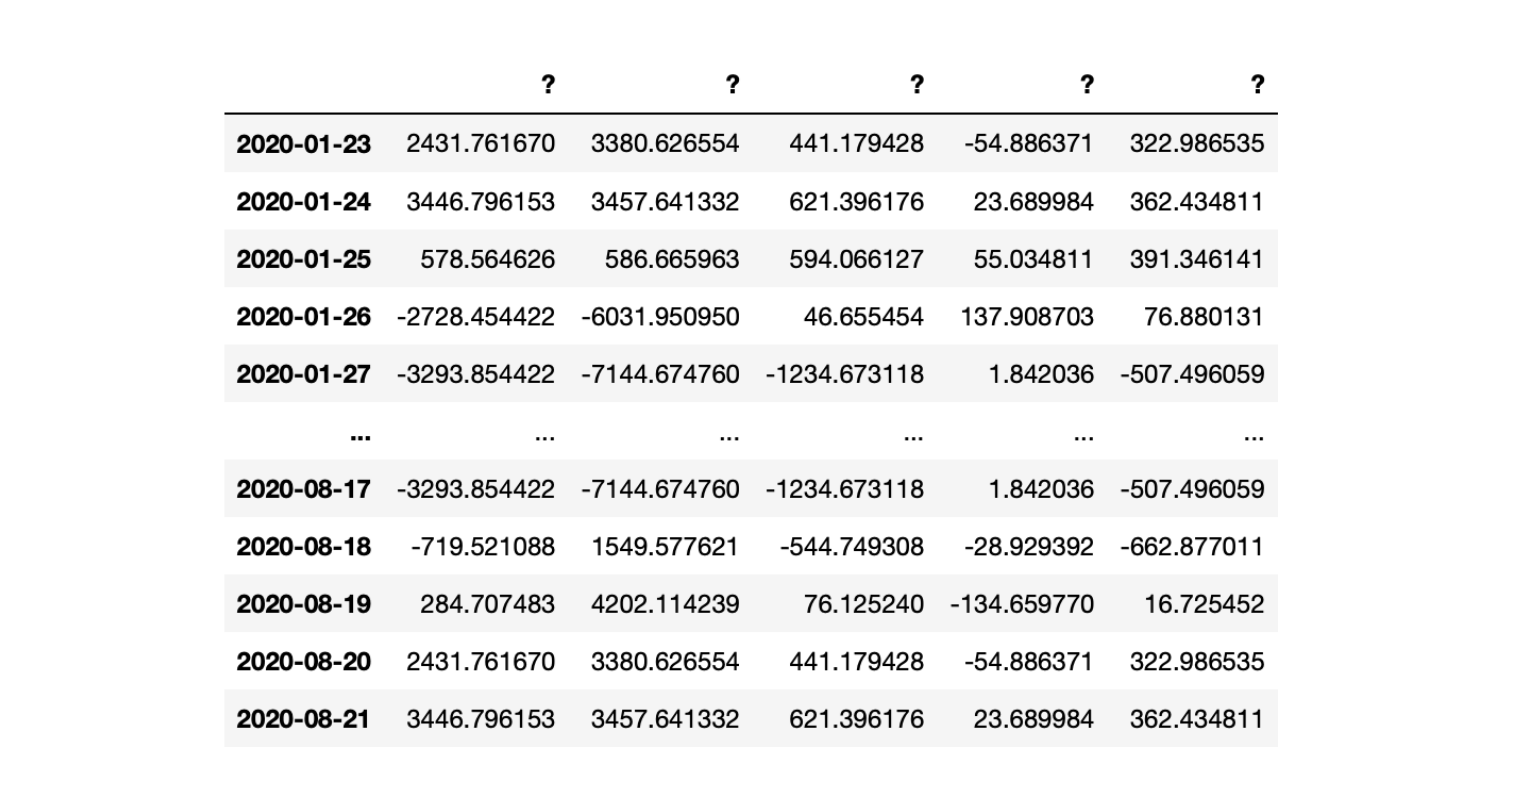

where
- the index of the DataFrame is a `pd.DatetimeIndex`;
- the column names "?" are the top 5 countries with the most cumulative cases as of August 21, 2020, sorted in descending order from left to right;
- the values of the DataFrame are the seasonal components S(t) as returned by the `seasonal_decompose` function from the `statsmodels` package; and
- the DataFrame doesn't contain any `NaN` values.

This function should return a `pd.DataFrame` of shape (len(df), 5), whose index is a `pd.DatetimeIndex` and whose column labels are the top 5 countries.

In [294]:
from statsmodels.tsa.seasonal import seasonal_decompose

def sea_decomp(df, model='additive'):
    sea_decomp = pd.concat([pd.DataFrame({col: seasonal_decompose(df[col], model=model).seasonal}) for col in df.columns], axis=1)
    sea_decomp.dropna(inplace=True)
    return sea_decomp

sea_decomp(df)  

,US,Brazil,India,Russia,South Africa
2020-01-23,2431.761670,3380.626554,441.179428,-54.886371,322.986535
2020-01-24,3446.796153,3457.641332,621.396176,23.689984,362.434811
2020-01-25,578.564626,586.665963,594.066127,55.034811,391.346141
2020-01-26,-2728.454422,-6031.950950,46.655454,137.908703,76.880131
2020-01-27,-3293.854422,-7144.674760,-1234.673118,1.842036,-507.496059
...,...,...,...,...,...
2020-08-17,-3293.854422,-7144.674760,-1234.673118,1.842036,-507.496059
2020-08-18,-719.521088,1549.577621,-544.749308,-28.929392,-662.877011
2020-08-19,284.707483,4202.114239,76.125240,-134.659770,16.725452
2020-08-20,2431.761670,3380.626554,441.179428,-54.886371,322.986535


b) [5 points] Then, using this function, please plot one line for each country in the top 5 showing the seasonal component - you should have a total of 5 line graphs where the x-axis is the date and the y-axis is the seasonal component

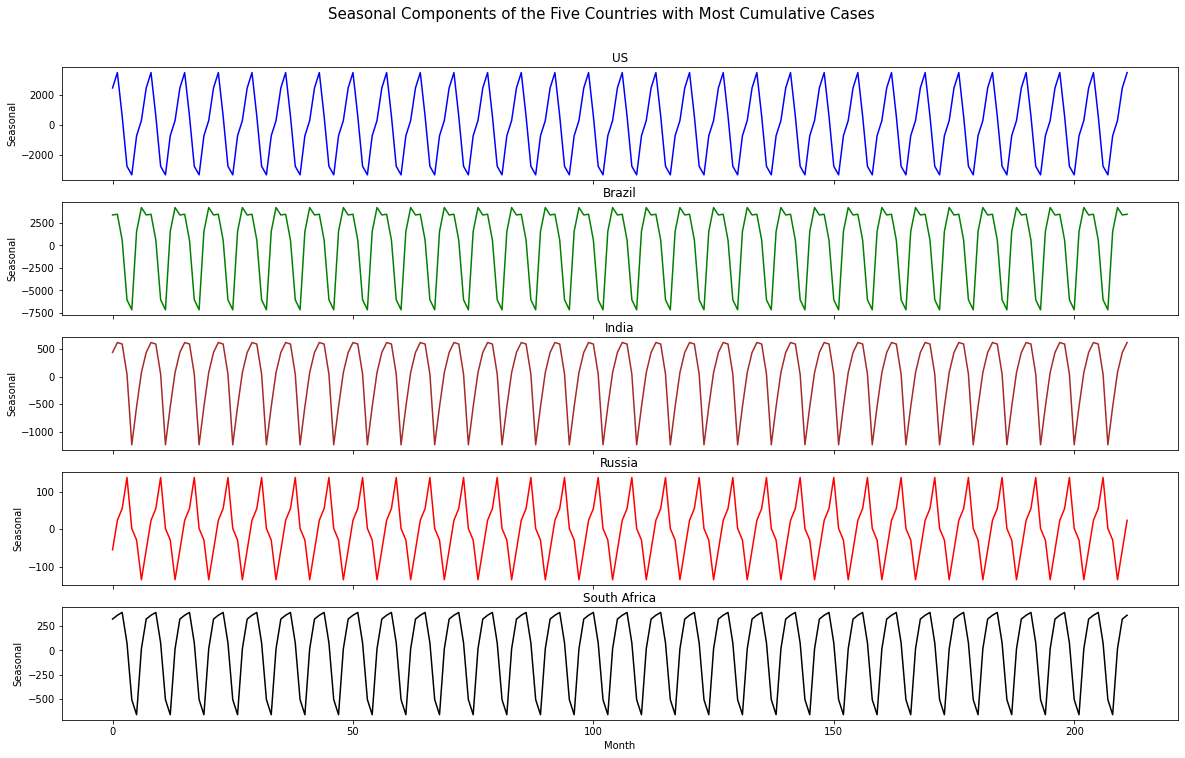

In [295]:
sea_decomp = sea_decomp(df)

fig, axes = plt.subplots(5, 1, figsize=(20, 12), sharex=True)
fig.suptitle("Seasonal Components of the Five Countries with Most Cumulative Cases", y=0.95, fontsize=15)
axes[4].set_xlabel("Month")

colors = ['blue', 'green', 'brown', 'red', 'black']
counter = 0
for col in sea_decomp.iteritems():
    axes[counter].set_title(col[0])
    axes[counter].plot(sea_decomp[col[0]].values, color=colors[counter])
    axes[counter].set_ylabel("Seasonal")
    counter += 1

# 3. Time Series Similarities [40 points]

## 3.1 Euclidean Distance [20 points]

Now, we may start to ask questions like, "which country in the top 5 countries are the most similar to Country A in terms of seasonal patterns?". In addition to the seasonal components that reflect seasonal patterns, we also need a measure of similarity between two time series in order to answer questions like this. One of such measures is the good old Euclidean Distance.

Recall that the Euclidean Distance between two vectors x and y is the length of the vector x - y:

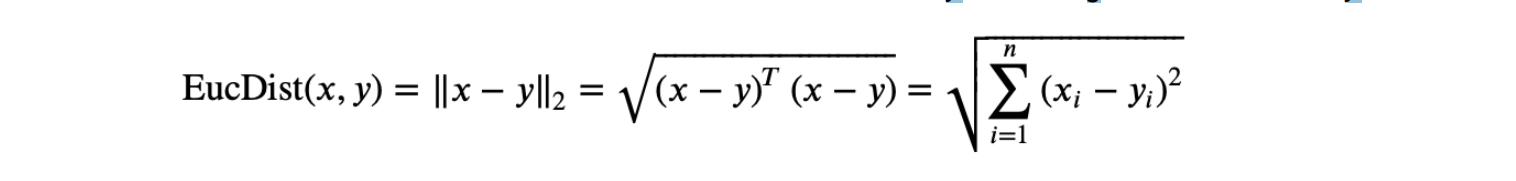

a) [15 points] Complete a function, ‘calc_euclidean_dist’, that accepts a `pd.DataFrame`, whose columns are time series for each country, and that returns all pairwise Euclidean Distance among these time series, similar to the following:

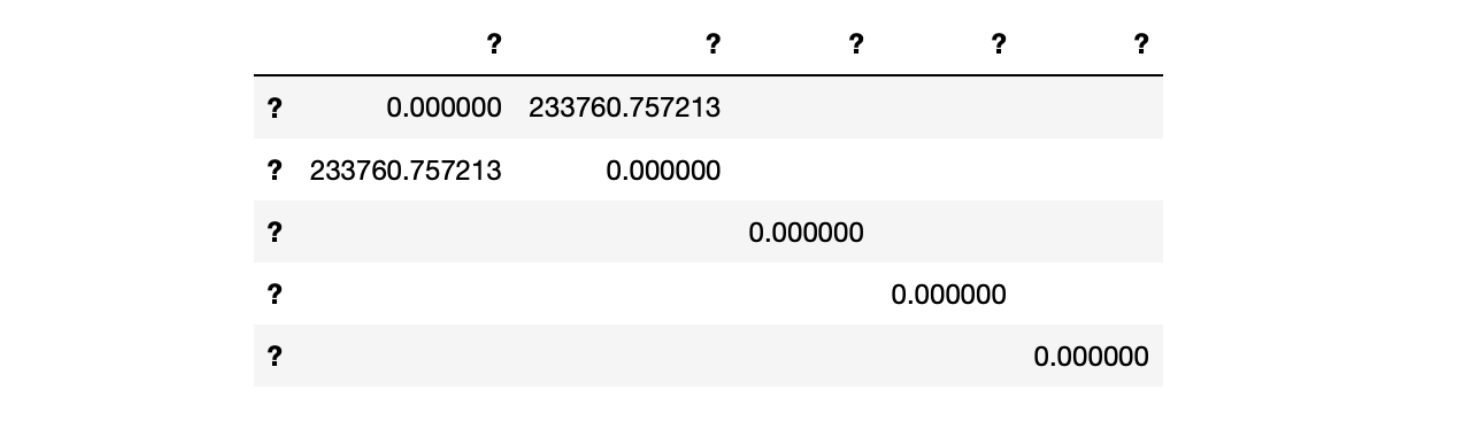

where
- the index and the column names "?" are the top 5 countries with the most cumulative cases as of August 21, 2020, sorted in descending order from top to bottom and from left to right; and
- the values of the DataFrame are pairwise Euclidean Distance, for example, `233760.757213` is the Euclidean Distance between the time series of the Rank 1 country and the Rank 2 country

This function should return a `pd.DataFrame` of shape (5, 5) whose index and column labels are the top 5 countries.

In [296]:
def calc_euclidean_dist(df):
    arrays = {}
    column_names = df.columns
    for (col_name, col_data) in df.iteritems():
        arrays[col_name] = col_data.to_numpy()
    
    rows = []
    for k, v in arrays.items():
        row = []
        for k2, v2 in arrays.items():
            dist = np.linalg.norm(v-v2)
            row.append(dist)
        rows.append(row)
        
    df = pd.DataFrame(rows, columns = column_names, index = column_names)
    
    return df

b) [5 points] Then, use this new function to calculate the pairwise Euclidean Distance matrix for the extracted seasonal components from the top 5 countries with the most cumulative cases.

In [297]:
eucl = calc_euclidean_dist(df)
eucl

,US,Brazil,India,Russia,South Africa
US,0.000000,233760.757213,272344.138927,433638.331574,436238.175972
Brazil,233760.757213,0.000000,178779.663740,306032.283923,304919.698741
India,272344.138927,178779.663740,0.000000,316862.767630,303936.538967
Russia,433638.331574,306032.283923,316862.767630,0.000000,67392.593681
South Africa,436238.175972,304919.698741,303936.538967,67392.593681,0.000000


## 3.2 Cosine Similarity [20 points]

Another commonly used similarity measure is the Cosine Similarity. Recall that the Cosine Similarity between two vectors x and y is the cosine of the angle between x and y:

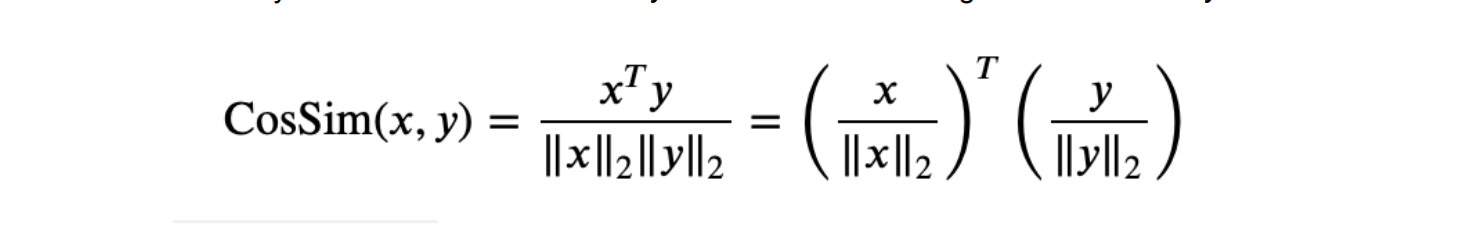

a) [15 points] Complete a function, ‘calc_cos_sim’, that accepts a `pd.DataFrame`, whose columns are the time series for each country, and that returns all pairwise Cosine Similarity among these time series, similar to the following:

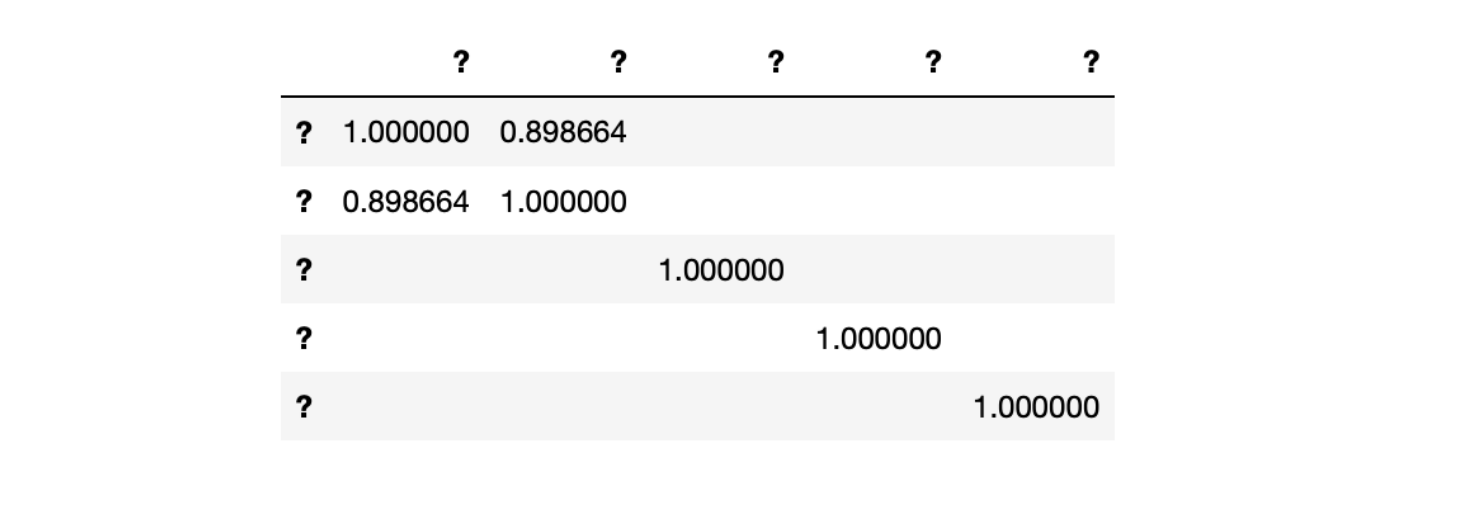

where
- the index and the column names "?" are the top 5 countries with the most cumulative cases as of August 21, 2020, sorted in descending order from top to bottom and from left to right; and
- the values of the DataFrame are pairwise Cosine Similarity, for example, `0.898664` is the Cosine Similarity between the time series of the Rank 1 country and the Rank 2 country

This function should return a `pd.DataFrame` of shape (5, 5), whose index and column labels are the top 5 countries.

In [298]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse

def calc_cos_sim(df):
    column_names = df.columns
    rows = []
    for (_, col_data) in df.iteritems():
        rows.append(col_data.values)
    
    rows_sparse = sparse.csr_matrix(rows)
    similarities = cosine_similarity(rows_sparse)
    df = pd.DataFrame(similarities, columns=column_names, index=column_names)
    
    return df

b) [5 points] Now, use this new function to calculate the pairwise Cosine Similarity between seasonal patterns.

In [299]:
cos = calc_cos_sim(df)  
print(cos.shape)
cos

(5, 5)


,US,Brazil,India,Russia,South Africa
US,1.000000,0.898664,0.847160,0.804740,0.884909
Brazil,0.898664,1.000000,0.878452,0.763523,0.871214
India,0.847160,0.878452,1.000000,0.590388,0.809944
Russia,0.804740,0.763523,0.590388,1.000000,0.638246
South Africa,0.884909,0.871214,0.809944,0.638246,1.000000


# 4. Dynamic Time Warping (DTW) Cost [25 points]

## 4.1 Define a Function to Calculate DTW Cost [10 points]

Last but not least, the cost of aligning two time series can also be used as a similarity measure. Two time series are more similar if it incurs less cost to align them. One of the commonly used alignment costs is the Dynamic Time Warping (DTW) cost, which we will explore in this problem.

Recall from lecture that the DTW cost is defined by the following recursive relations:

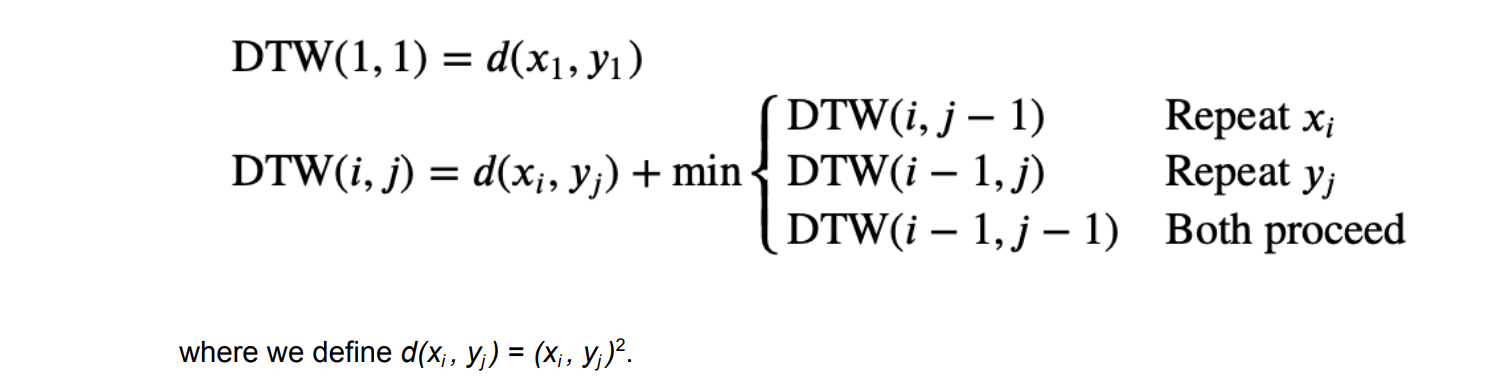

a) [10 points] With reference to the demo of the DTW algorithm in the lecture slides, implement a function, ‘calc_pairwise_dtw_cost’, below that computes the DTW cost for two time series. We don't take the square root of the results just yet, until later when we compare the
DTW costs with the Euclidean Distance.

This function should EITHER return a `np.ndarray` of shape (len(y), len(x)) which represents the DTW cost matrix, OR a single `float` that represents the overall DTW cost, depending whether the parameter `ret_matrix=True`.

In [300]:
def calc_pairwise_dtw_cost(time_seriesA, time_seriesB, ret_matrix=False):
    a, b = len(time_seriesA), len(time_seriesA)
    matrix = np.zeros((a+1, b+1))
    
    #Build a matrix fitted for the passed time series
    for i in range(a+1):
        for j in range(b+1):
            matrix[a, b] = np.inf
    matrix[0, 0] = 0
    
    #Calculate DTW for each pair   
    for i in range(1, a+1):
        for j in range(1, b+1):
            cost = abs(time_seriesA[i-1] - time_seriesB[j-1]) #distance
            last_min = np.min([matrix[i-1, j], matrix[i, j-1], matrix[i-1, j-1]])
            matrix[i, j] = cost**2 + last_min
            
    if ret_matrix:
        return matrix
    else:
        return matrix[-1][-1] #return last value in matrix

In [301]:
us_brazil = calc_pairwise_dtw_cost(sea_decomp['US'], sea_decomp['Brazil'], ret_matrix=True)
print(us_brazil.shape)
us_brazil

(213, 213)


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 9.00344568e+05, 1.05242908e+06, ...,
        3.13414822e+06, 9.00344568e+05, 1.05242908e+06],
       [0.00000000e+00, 4.37841582e+03, 4.49603373e+03, ...,
        1.34875411e+06, 9.04722984e+05, 9.00462186e+05],
       ...,
       [0.00000000e+00, 9.58471489e+06, 1.96522241e+07, ...,
        1.02771526e+09, 1.03729997e+09, 1.04736748e+09],
       [0.00000000e+00, 9.00344568e+05, 1.95277365e+06, ...,
        1.01710323e+09, 1.01800357e+09, 1.01905600e+09],
       [0.00000000e+00, 4.37841582e+03, 4.49603373e+03, ...,
        1.01531783e+09, 1.01532221e+09, 1.01532233e+09]])

## 4.2 Compute Pairwise DTW Cost [15 points]

Now let's compute all pairwise DTW costs for our five time series.

a) [10 points] Implement a function, ‘calc_dtw_cost’, below that accepts a `pd.DataFrame`, whose columns are the time series for each country, and that returns all pairwise DTW costs among these time series, similar to the following:

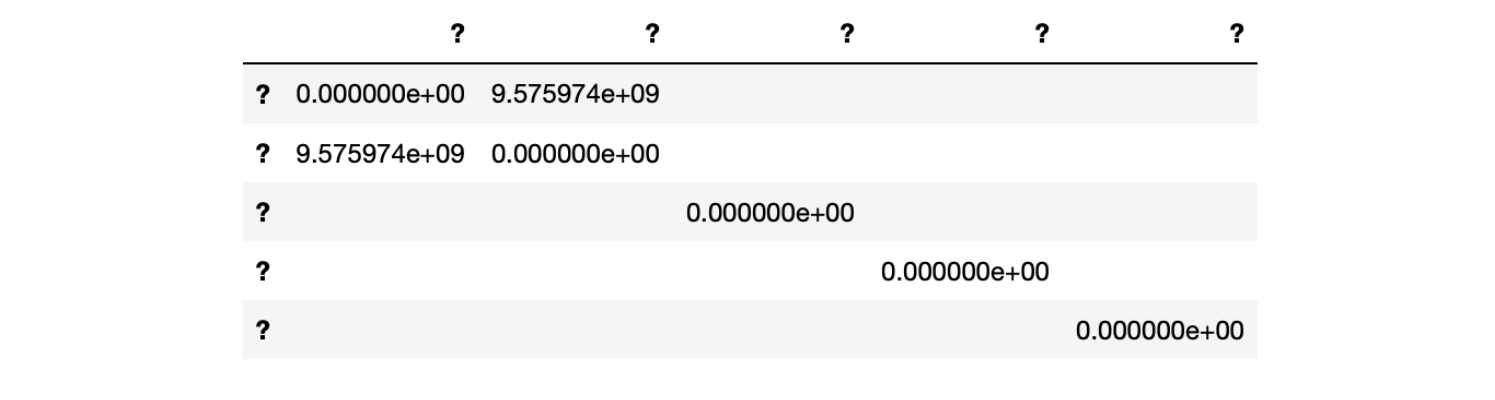

where
- the index and the column names "?" are the top 5 countries with the most cumulative cases as of August 21, 2020, sorted in descending order from top to bottom and from left to right; and
- the values of the DataFrame are pairwise DTW costs, for example, `9.575974e+09` is the DTW cost between the time series of the Rank 1 country and the Rank 2 country

This function should return a `pd.DataFrame` of shape (5, 5), whose index and column labels are the top 5 countries

In [302]:
def calc_dtw_cost(df):
    rows = []
    column_names = df.columns
    for (_, col_data1) in df.iteritems():
        row = []
        for (_, col_data2) in df.iteritems():
            temp = calc_pairwise_dtw_cost(col_data1, col_data2, ret_matrix=False)
            row.append(temp)
           
        rows.append(row)
    df = pd.DataFrame(rows, columns=column_names, index=column_names)
    return df

b) [5 points] Now, use this function to calculate the pairwise DTW costs between seasonal patterns. Please take the square root so that we can compare it with the Euclidean Distance.

What can you say about the similarities among these seasonal patterns? Do the results of the pairwise Euclidean Distance, Cosine Similarity and DTW Cost calculations tell the same story?

In [303]:
normal = calc_dtw_cost(df)
normal

,US,Brazil,India,Russia,South Africa
US,0.000000e+00,9.575970e+09,5.187266e+09,1.740747e+11,1.395159e+11
Brazil,9.575970e+09,0.000000e+00,1.430988e+10,5.535404e+10,6.542700e+10
India,5.187266e+09,1.430988e+10,0.000000e+00,9.927626e+10,8.728948e+10
Russia,1.740747e+11,5.535404e+10,9.927626e+10,0.000000e+00,1.638078e+08
South Africa,1.395159e+11,6.542700e+10,8.728948e+10,1.638078e+08,0.000000e+00


In [304]:
#square root of DTW Cost
np.sqrt(normal)

,US,Brazil,India,Russia,South Africa
US,0.000000,97856.887494,72022.680456,417222.557409,373518.276651
Brazil,97856.887494,0.000000,119623.927698,235274.398758,255787.017204
India,72022.680456,119623.927698,0.000000,315081.350283,295447.922809
Russia,417222.557409,235274.398758,315081.350283,0.000000,12798.743454
South Africa,373518.276651,255787.017204,295447.922809,12798.743454,0.000000


In [305]:
#Euclidian distances for comparison
eucl

,US,Brazil,India,Russia,South Africa
US,0.000000,233760.757213,272344.138927,433638.331574,436238.175972
Brazil,233760.757213,0.000000,178779.663740,306032.283923,304919.698741
India,272344.138927,178779.663740,0.000000,316862.767630,303936.538967
Russia,433638.331574,306032.283923,316862.767630,0.000000,67392.593681
South Africa,436238.175972,304919.698741,303936.538967,67392.593681,0.000000


In [306]:
#Cosine Similarities for comparison
cos

,US,Brazil,India,Russia,South Africa
US,1.000000,0.898664,0.847160,0.804740,0.884909
Brazil,0.898664,1.000000,0.878452,0.763523,0.871214
India,0.847160,0.878452,1.000000,0.590388,0.809944
Russia,0.804740,0.763523,0.590388,1.000000,0.638246
South Africa,0.884909,0.871214,0.809944,0.638246,1.000000


[answer] The DTW Cost dataframe demonstrates there is a high degree of similarity between the seasonal patterns. Chief among them, they are all on orders of magnitude of 8 through 11 -- relatively close in size and scale. The small differences between them are made clearer when comparing with the results of the Euclidean Distance, Cosine Similarity and square root of the DTW Cost calculations. These all map one clear relationship: the lower cosine similarity country pairings have higher euclidian distances and higher DTW costs. This makes sense because time series pairings with lower degrees of similarity are going to have larger distances and higher costs of calculating. 